<center><img src="logo.png" width="5%"></center>
<h1 style='text-align:center'>Project: Customer Churn Prediction</h1>

> **BY TheACJ** AGBAI C JOSHUA



# Customer Churn Prediction

The Customer Churn table contains information on all 7,043 customers from a Telecommunications company in California in Q2 2022


Each record represents one customer, and contains details about their demographics, location, tenure, subscription services, status for the quarter (joined, stayed, or churned), and more!

The Zip Code Population table contains complimentary information on the estimated populations for the California zip codes in the Customer Churn table

> The boxplot implies that new customers are more likely to churn

Importing necessary files

In [1]:
import numpy as np
import pandas as pd
import missingno as msno

In [2]:
df=pd.read_csv('telecom_customer_churn.csv')
df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


Overviewing all the columns in the dataset

In [3]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [4]:
df1 = df.copy()
df1.head(7)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.4,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.7,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN


Creating a copy of the Dataset

In [5]:
df1.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

# Exploratory Data Analysis

## Data Preprocessing

Dropping unwanted columns from the dataset

In [6]:
df1.drop(['Customer ID','Total Refunds','Zip Code','Latitude', 'Longitude','Churn Category', 'Churn Reason'],axis='columns',inplace=True)
df1.shape


(7043, 31)

**Visualize Missing values**

<Axes: >

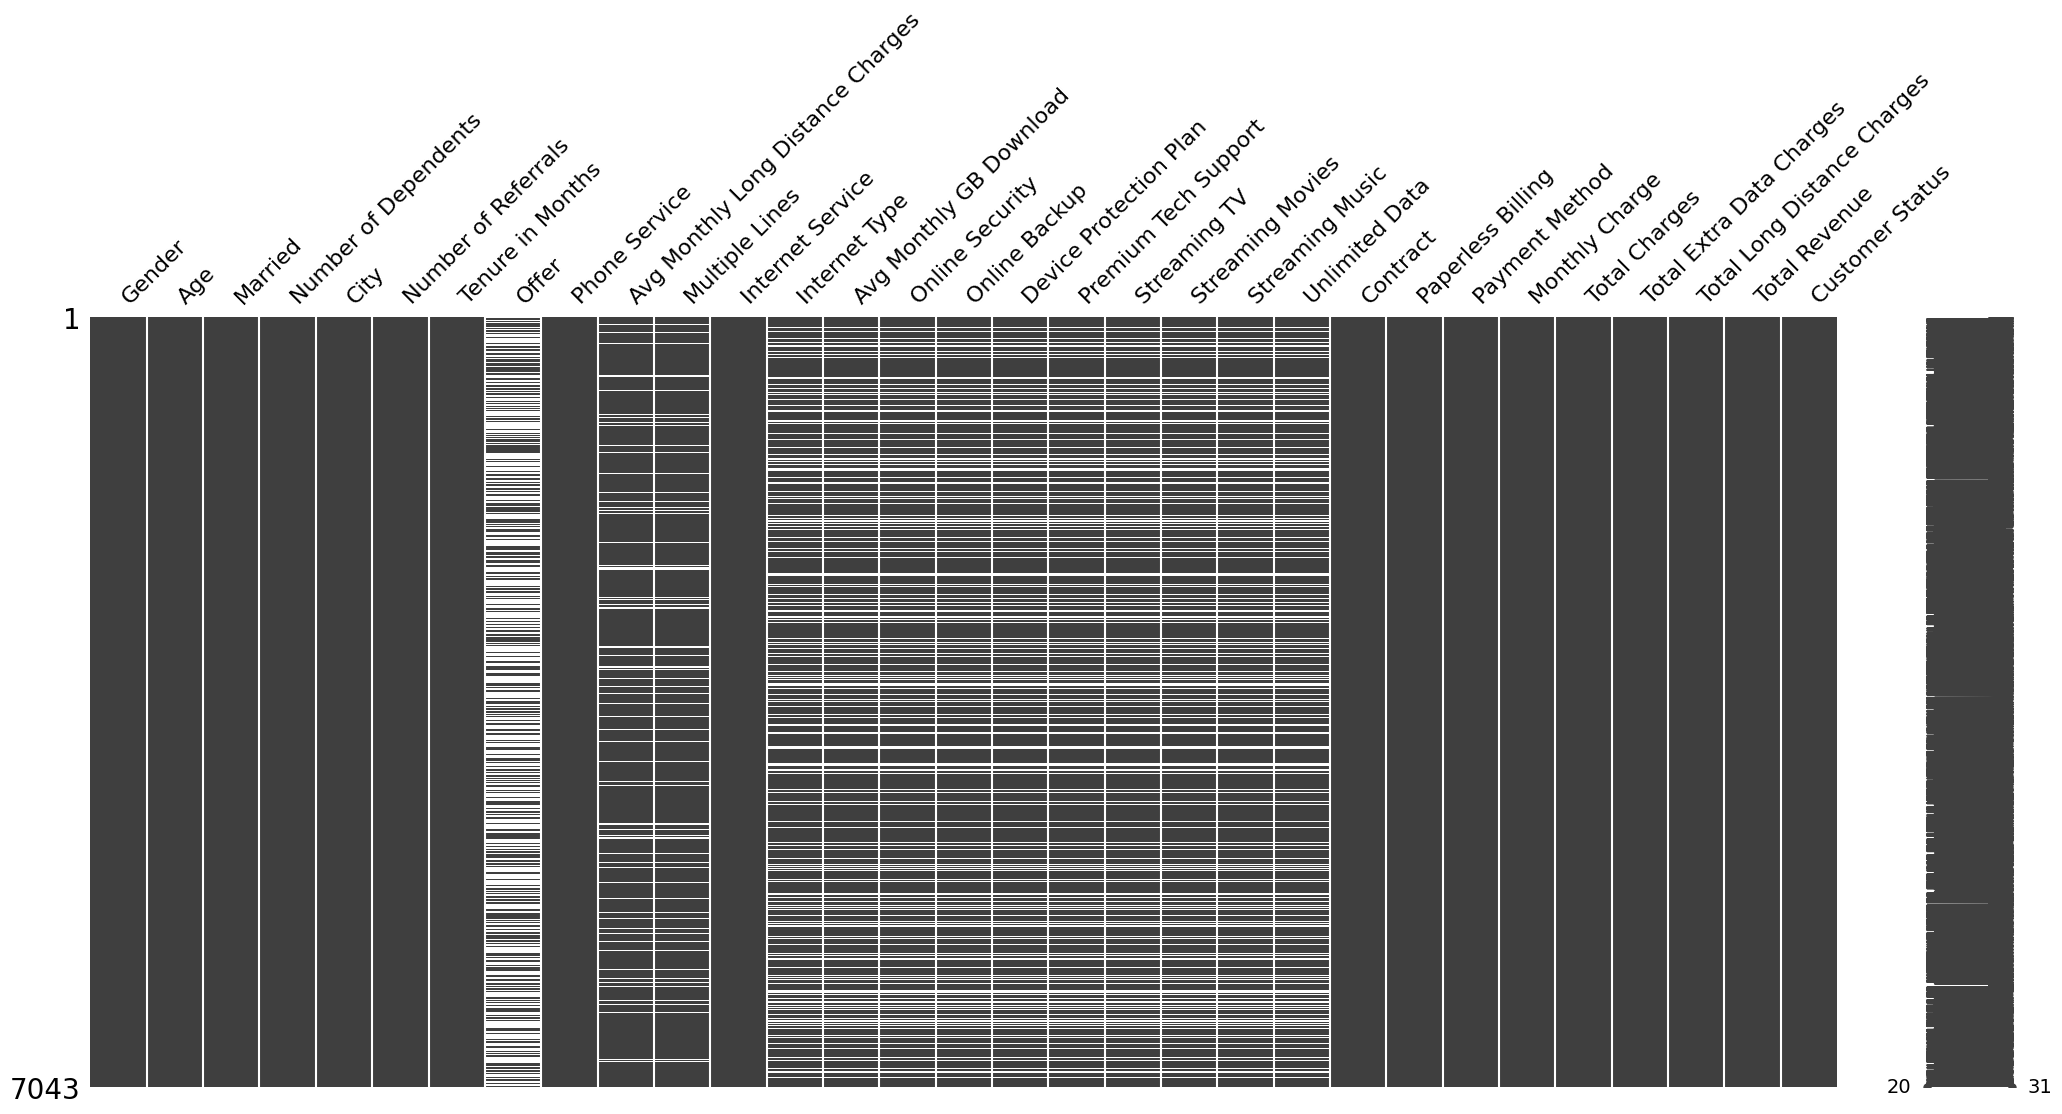

In [7]:
msno.matrix(df1)

In [8]:
df1.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract  

Checking the number of unique values in each column

In [9]:
# This cell of code gets to count and print the number of unique values in each column 
features = df1.columns
for feature in features:
     print(f'{feature}--->{df[feature].nunique()}')

Gender--->2
Age--->62
Married--->2
Number of Dependents--->10
City--->1106
Number of Referrals--->12
Tenure in Months--->72
Offer--->5
Phone Service--->2
Avg Monthly Long Distance Charges--->3583
Multiple Lines--->2
Internet Service--->2
Internet Type--->3
Avg Monthly GB Download--->49
Online Security--->2
Online Backup--->2
Device Protection Plan--->2
Premium Tech Support--->2
Streaming TV--->2
Streaming Movies--->2
Streaming Music--->2
Unlimited Data--->2
Contract--->3
Paperless Billing--->2
Payment Method--->3
Monthly Charge--->1591
Total Charges--->6540
Total Extra Data Charges--->16
Total Long Distance Charges--->6068
Total Revenue--->6975
Customer Status--->3


Getting the percentge of Null Values in each Column

In [10]:
df1.isnull().sum() / df1.shape[0]

Gender                               0.000000
Age                                  0.000000
Married                              0.000000
Number of Dependents                 0.000000
City                                 0.000000
Number of Referrals                  0.000000
Tenure in Months                     0.000000
Offer                                0.550476
Phone Service                        0.000000
Avg Monthly Long Distance Charges    0.096834
Multiple Lines                       0.096834
Internet Service                     0.000000
Internet Type                        0.216669
Avg Monthly GB Download              0.216669
Online Security                      0.216669
Online Backup                        0.216669
Device Protection Plan               0.216669
Premium Tech Support                 0.216669
Streaming TV                         0.216669
Streaming Movies                     0.216669
Streaming Music                      0.216669
Unlimited Data                    

> One can see that the Offer column has 55% of it's value as Null

Cleaning Function for the Dataset

In [11]:
# This Function is created to clean dataset
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [12]:
# Fill missing data in the numerical columns
df1=df1.interpolate()

C:\Users\TheAC\AppData\Local\Temp\ipykernel_10388\1348749371.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df1=df1.interpolate()


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              3166 non-null   object 
 8   Phone Service                      7043 non-null   object 
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     6361 non-null   object 
 11  Internet Service                   7043 non-null   objec

In [14]:
df1=df1.dropna()
df1.head()

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,...,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0,361.66,1599.51,Churned
5,Female,23,No,3,Midpines,0,9,Offer E,Yes,16.77,...,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0,150.93,722.38,Stayed
6,Female,67,Yes,0,Lompoc,1,71,Offer A,Yes,9.96,...,Yes,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0,707.16,8611.41,Stayed
7,Male,52,Yes,0,Napa,8,63,Offer B,Yes,12.96,...,No,Two Year,Yes,Credit Card,84.65,5377.80,20,816.48,6214.28,Stayed


In [15]:
number_columns=['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

Checking the unique values of column having datatype: 'object'

In [16]:
# Function to print out unique values in all columns in a dataset
def unique_values_names(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [17]:
unique_values_names(df1)

Gender:['Male' 'Female']
Married:['No' 'Yes']
City:['Costa Mesa' 'Martinez' 'Midpines' 'Lompoc' 'Napa' 'Simi Valley'
 'La Mesa' 'Woodlake' 'San Marcos' 'Alpaugh' 'Moss Beach' 'Stockton'
 'Los Angeles' 'Yermo' 'Fremont' 'El Portal' 'Calistoga' 'North Hollywood'
 'Inverness' 'Modesto' 'Kenwood' 'Morongo Valley' 'Palo Verde' 'Valyermo'
 'Monterey Park' 'Big Oak Flat' 'Glenhaven' 'Lodi' 'Fairfield' 'Moorpark'
 'Solvang' 'Del Rey' 'Armona' 'Mckinleyville' 'Calimesa' 'Garden Grove'
 'Indio' 'San Diego' 'Escondido' 'Chino' 'Calexico' 'Groveland'
 'Los Gatos' 'Clovis' 'Buellton' 'Midway City' 'Folsom' 'San Clemente'
 'Bodega Bay' 'Challenge' 'Ludlow' 'Santa Clara' 'Rescue' 'Lotus'
 'Harbor City' 'Death Valley' 'Riverdale' 'Claremont' 'Upland'
 'Santa Rosa' 'Long Beach' 'Samoa' 'Milford' 'Anderson' 'Orange'
 'San Francisco' 'Santa Cruz' 'Lake Hughes' 'Paramount'
 'San Juan Capistrano' 'Copperopolis' 'Cypress' 'Lancaster' 'San Ysidro'
 'Gilroy' 'San Jose' 'Stanford' 'Turlock' 'Los Alamitos' 'Enc

# Data Visualization

In [18]:
import plotly.express as px 
import plotly.graph_objs as go
from plotly.subplots import make_subplots

>**Visualizing The churn distribution**

In [19]:
type_ = ["Churned", "Stayed", "Joined"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['Customer Status'].value_counts(), name="Customer "))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

> With the above viz we understand the churn distribution, we can observe that 26.5% of the customers churned

In [20]:
# Viz that shows all the age groups and number of customers in respective age group
fig = px.histogram(df1, x = 'Age')
fig.show()

Checking the stats in number_columns of the copied dataset

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of Dependents'}>,
        <Axes: title={'center': 'Number of Referrals'}>],
       [<Axes: title={'center': 'Tenure in Months'}>,
        <Axes: title={'center': 'Avg Monthly Long Distance Charges'}>,
        <Axes: title={'center': 'Avg Monthly GB Download'}>],
       [<Axes: title={'center': 'Monthly Charge'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Extra Data Charges'}>],
       [<Axes: title={'center': 'Total Long Distance Charges'}>,
        <Axes: title={'center': 'Total Revenue'}>, <Axes: >]],
      dtype=object)

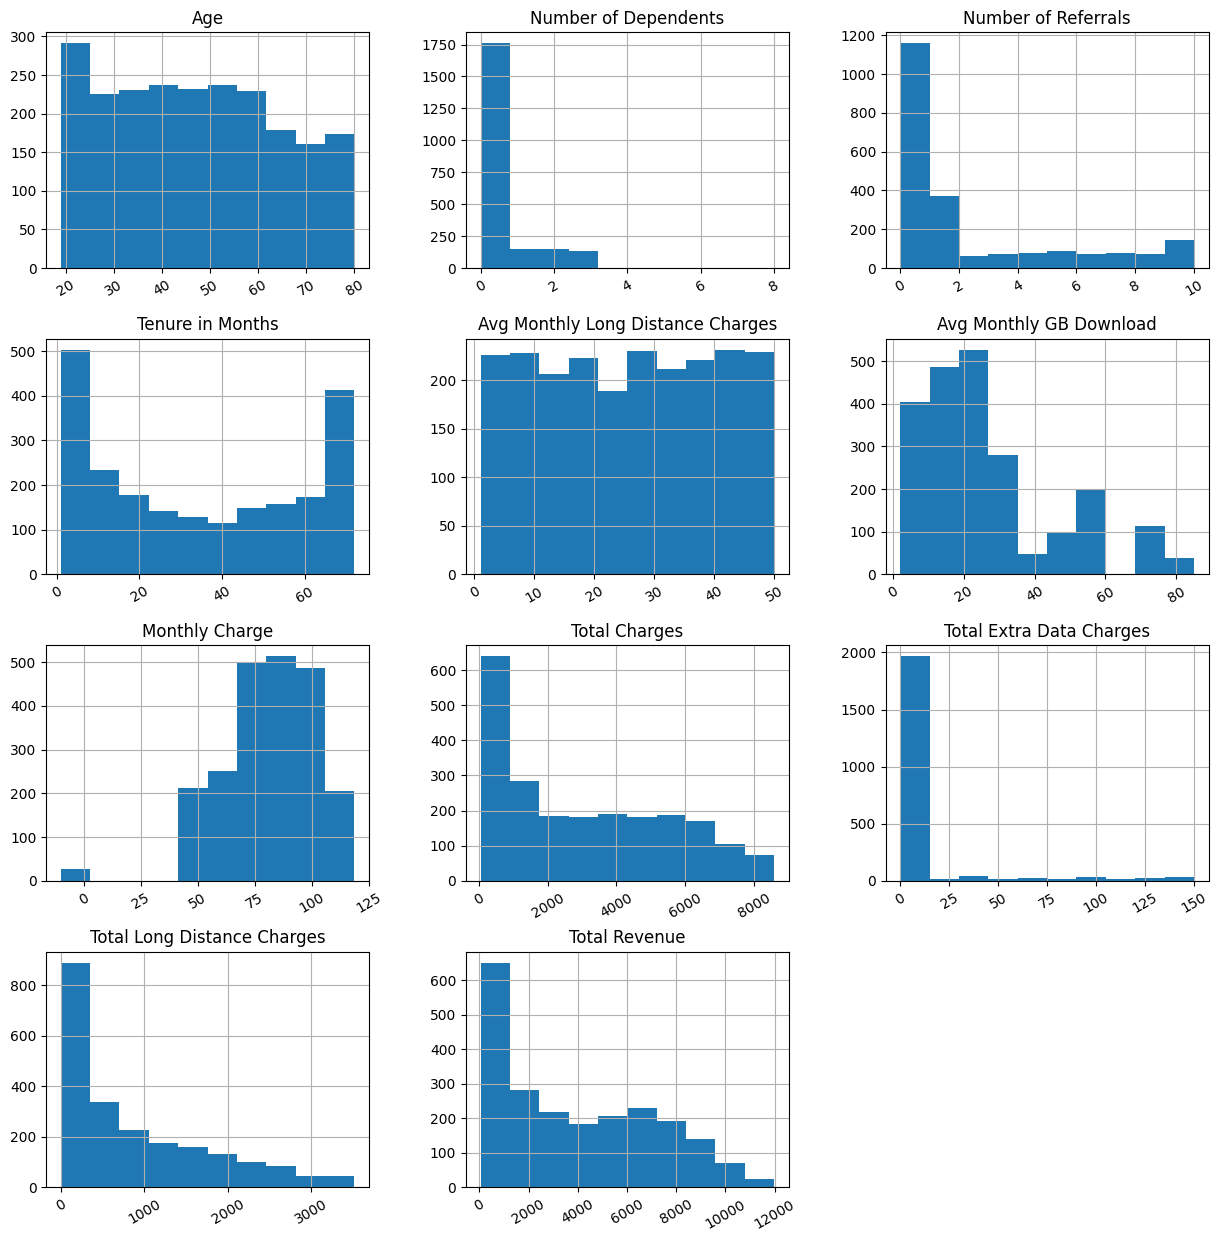

In [22]:
# Visualisation of all the numerical Columns in a Histogram
df1.hist(figsize=(15,15), xrot=30)

In [23]:
df['Customer Status'][df['Customer Status'] == 'Churned'].groupby(by = df.Gender).count()

Gender
Female    939
Male      930
Name: Customer Status, dtype: int64

In [24]:
df['Customer Status'][df['Customer Status'] == 'Stayed'].groupby(by = df.Gender).count()


Gender
Female    2338
Male      2382
Name: Customer Status, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

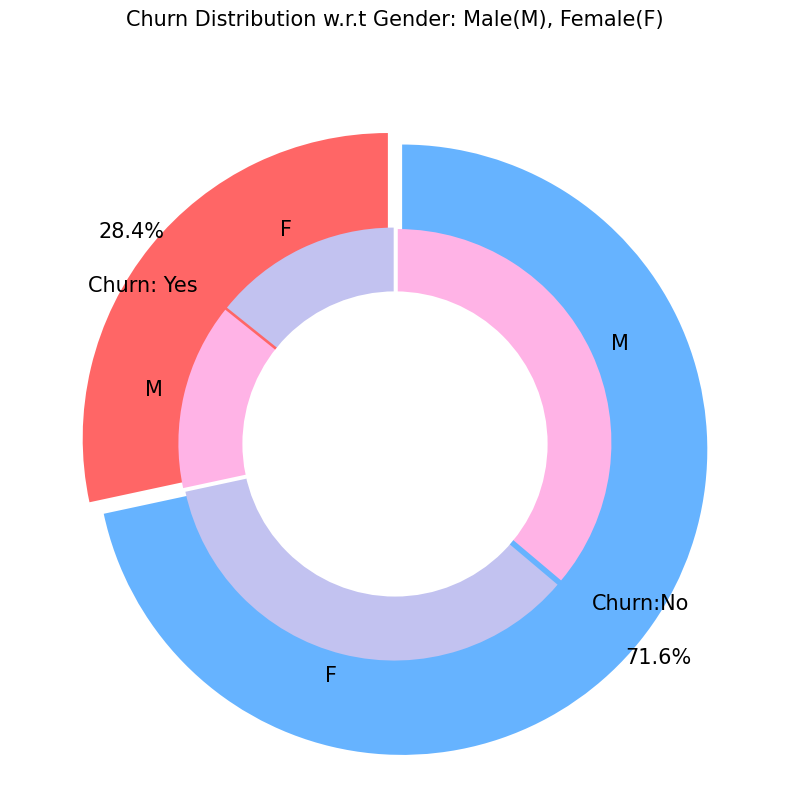

In [26]:
plt.figure(figsize=(8, 8))
labels =["Churn: Yes","Churn:No"]
values = [1869,4720] # 1869 is value for churned customers (M & F), while 4720 is value of old customers not churned (M & F)
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2338,2382] # This are sizes for; churned F , M - not churned F, M 
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [27]:
Customer_Stayed = df[df['Customer Status'] == 'Stayed']['Gender']
Customer_Churned = df[df['Customer Status'] == 'Churned']['Gender']
# Customer_Joined = df1[df1['Customer Status'] == 'Joined']['Gender']

# Create traces
stayed = go.Histogram(
    x=Customer_Stayed,
    opacity=0.7,
    name='Stayed',
    marker=dict(color='#66b3ff')
)

churned = go.Histogram(
    x=Customer_Churned,
    opacity=0.7,
    name='Churned',
    marker=dict(color='#ff6666')
)

# joined = go.Histogram(
#     x=Customer_Joined,
#     opacity=0.7,
#     name='Joined',
#     marker=dict(color='blue')
# )

# Layout configuration
layout = go.Layout(
    title='Customers Behavior by Gender',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Customer Numbers'),
    barmode='overlay',  # Overlay histograms for comparison
)

# Combine traces and layout into a figure
fig = go.Figure(data=[stayed, churned], layout=layout)

# Show the plot
fig.show()

> The visual above gives us an idea of the churn and stayed distribution amongst the Female and Male customers
   - In the stayed bar we can see that 2382 male customers stayed and 2338 female customers also stayed
   - In the Churned bar it appears that 939 female customers left the firm while 930 male customers also left
   - Since out of 2338 female old customers 939 churned it means only 40.2% of female customers churned
   - Having that out of 3312 male old customers 930 churned; this means that 28% of male customers churned
> With the above one can conclude that female customers churned the most.

In [28]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70+']
df1['Age Group'] = pd.cut(df1['Age'], bins=bins, labels=labels)

# Summarize the data by age group and customer status
age_group_status = df1.groupby(['Age Group', 'Customer Status']).size().unstack()

# Create the bar chart
fig = go.Figure()

for status in age_group_status.columns:
    fig.add_trace(go.Bar(x=age_group_status.index, y=age_group_status[status], name=status))

# Layout configuration
fig.update_layout(title='Customer Behavior by Age Group', 
                  xaxis_title='Age Group', 
                  yaxis_title='Number of Customers',
                  barmode='group')

# Show the plot
fig.show()

C:\Users\TheAC\AppData\Local\Temp\ipykernel_10388\2591419456.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



> There are a few takeaways in this viz, these are worthy of note;
1. People in their 30s has the highest **Stays** with upto 271 people staying out of 380 people (this excludes the customers that just joined which is 19 people)
2. People in their 20s has the highest **Churn** with upto 127 people churned out 407 people (this excludes the customers who just joined, which is just 13 people)
3. People in their 40s has the highest **Join** with upto 24 people joining the firm

In [48]:
ct = pd.crosstab(df['Customer Status'], df['Married'])
fig = px.bar(ct.reset_index(), x='Customer Status', y=['No', 'Yes'], barmode='group')
fig.update_layout(legend_title_text='Married?', legend=dict(orientation='h',yanchor='bottom',y=1.02, xanchor='right', x=1))
fig.update_layout(title="Customer Status by Marital Status", xaxis_title='Customer Status', yaxis_title='Count')
fig.show()

> The viz above gives us insight into the distribution of our churned customers classified along the line of marital status. Observations:
   - In the stayed bar we can see that 2649 married customers stayed and 2071 single customers stayed as well
   - In the Churned bar it appears that 1200 single customers left the firm while 669 married customers also left
   - Since out of 3320 married old customers 669 churned it means only 20.2% of married customers churned
   - Having that out of 3271 single old customers 1200 churned; this means that 36.7% of single customers churned
> With the above one can conclude that single customers churned the most.

In [29]:
fig = px.histogram(df, x="Customer Status", color = "Contract", barmode = "group", title = "<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500)
fig.show()

> The above viz implies that customers with monthly contract are more likely to churn

In [30]:
labels = df['Payment Method'].unique()
values = df['Payment Method'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

fig = px.histogram(df, x="Customer Status", color="Payment Method", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
#fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [31]:
df[df["Gender"]=="Male"][["Internet Type", "Customer Status"]].value_counts()

Internet Type  Customer Status
Fiber Optic    Stayed             858
DSL            Stayed             630
Fiber Optic    Churned            602
Cable          Stayed             272
DSL            Churned            163
Cable          Churned            108
DSL            Joined              65
Fiber Optic    Joined              52
Cable          Joined              26
Name: count, dtype: int64

In [32]:
df[df["Gender"]=="Female"][["Internet Type", "Customer Status"]].value_counts()

Internet Type  Customer Status
Fiber Optic    Stayed             840
               Churned            634
DSL            Stayed             600
Cable          Stayed             289
DSL            Churned            144
Cable          Churned            105
DSL            Joined              50
Fiber Optic    Joined              49
Cable          Joined              30
Name: count, dtype: int64

In [33]:

fig = go.Figure()

# Creating a trace for Churn status for male and female using DSL internet service
fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [600, 630, 144, 163],
  name = 'DSL',
))

# Creating a trace for Churn status for male and female using Fiber optic internet service
fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [840, 858, 634, 602],
  name = 'Fiber optic',
))

# Creating a trace for Churn status for male and female using No internet service
fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [289, 272, 105, 108],
  name = 'Cable',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [34]:
color_map = {"Yes": "#22FF00", "No": "#FFA1A1"}
fig = px.histogram(df, x="Customer Status", color="Online Security", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.4)
fig.show()

> The viz above gives us the idea that customers without Online Security churned more than customers with online security

In [35]:
color_map = {"Yes": '#22FF00', "No": '#FF2200'}
fig = px.histogram(df, x="Customer Status", color="Paperless Billing",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

> We can observe that customers with Paperless Billing churned more than customers without Paperless Billing

In [36]:
fig = px.histogram(df, x="Customer Status", color="Premium Tech Support",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

> we can see that customers with Premium Tech Support Churned more than customers without Premium Tech Support

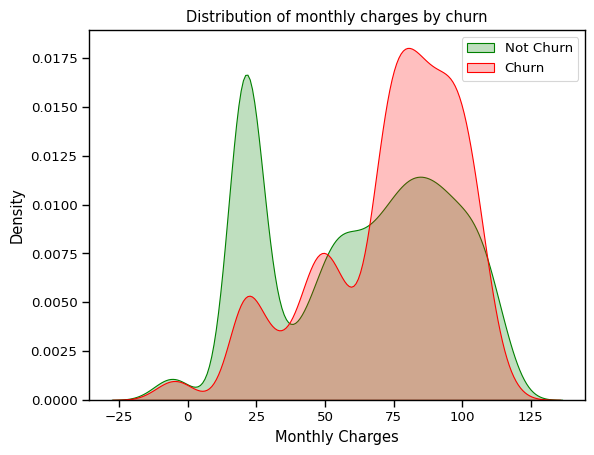

In [38]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df['Monthly Charge'][(df["Customer Status"] == 'Stayed') ],
                color="green", fill = True);
ax = sns.kdeplot(df['Monthly Charge'][(df["Customer Status"] == 'Churned') ],
                ax =ax, color="red", fill = True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

> The viz implies that customers who stayed the most are in the early 20s.
<h4 style="text-align: center"> & </h4>

>It also tells us that customers above 75 churned the most 

In [56]:
fig = px.box(df, x='Customer Status', y = 'Tenure in Months')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

> The boxplot implies that new customers are more likely to churn

 ## Defining Correlation between the columns in the dataset

<Axes: >

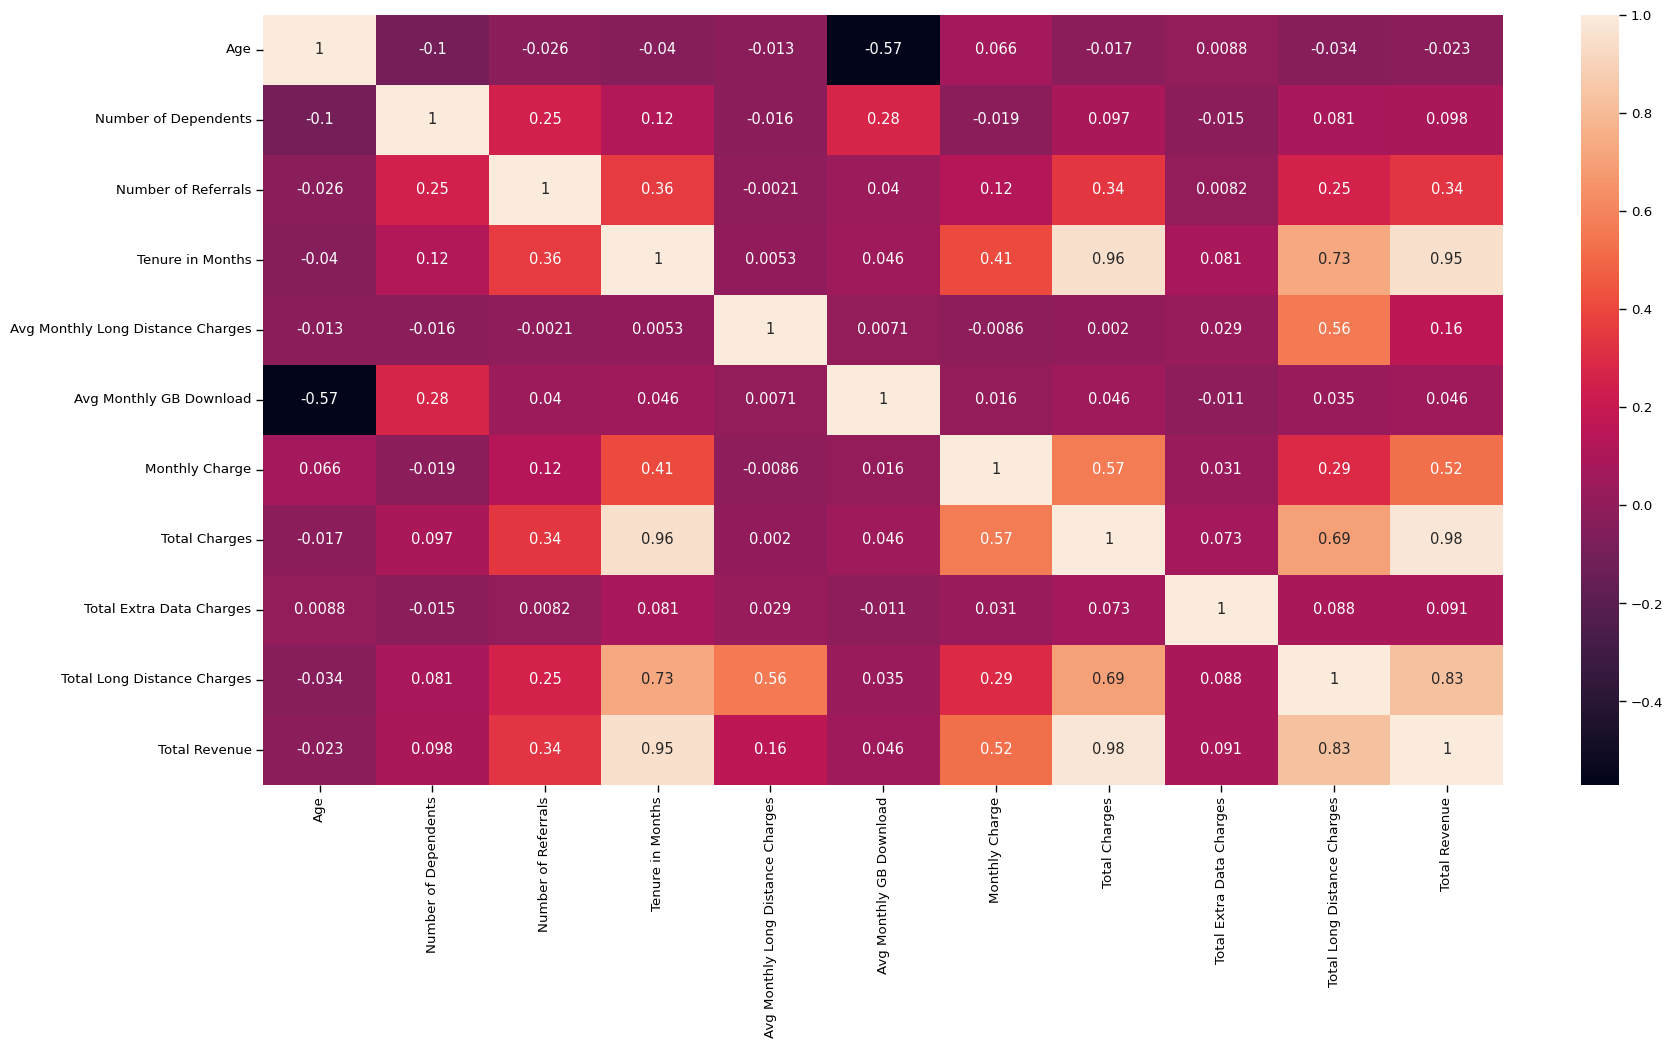

In [39]:
number_df1 = df1.select_dtypes(include=['int64', 'float64'])
data  = number_df1.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data, annot = True)

> The above visual tells us how the respective columns correlates with each other.
* It is observed that the highest correlation in this viz is 0.98 (Total Charges **corr** Total Revenue). Which actually makes sense, the more a firm charges a customer the more the firm brings in revenue
* Age column and Avg Download GB column has the lowest correlation -0.57

Analyzing Outlier in the dataset with respect to customer status

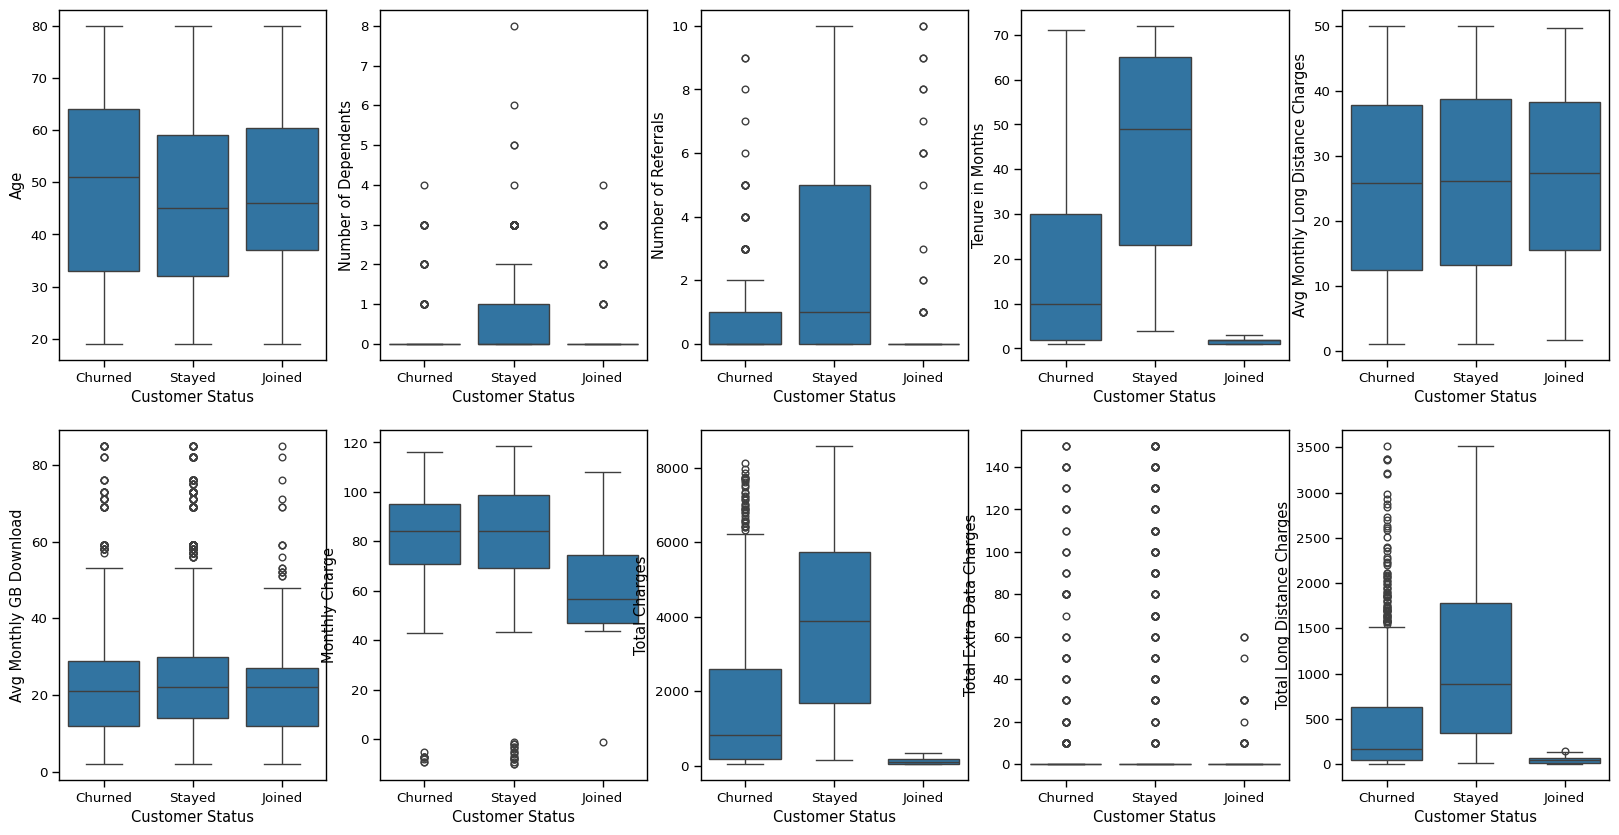

In [40]:
# Analysing Outlier in the dataset with respect to customer status
fig, ax = plt.subplots(2,5, figsize = (20,10))
for i, subplot in zip(number_columns, ax.flatten()):
    sns.boxplot(x = 'Customer Status', y = i , data = df1, ax = subplot)

In [41]:
fig = px.density_heatmap(df1, x='Age', y='Total Charges')
fig.show()

In [42]:
df1.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Age Group'],
      dtype='object')

In [49]:
df1['Payment Method'].unique()

array(['Bank Withdrawal', 'Credit Card', 'Mailed Check'], dtype=object)

Create dictionary with role / data key value pairs

In [50]:
Roles = {}
for j in df1['Payment Method'].unique():
    Roles[j] = df1[df1['Payment Method'] == j]

In [51]:
Roles.keys()

dict_keys(['Bank Withdrawal', 'Credit Card', 'Mailed Check'])

Selecting the rows where the role is 'Credit Card'

In [52]:
Roles['Credit Card']

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Age Group
5,Female,23,No,3,Midpines,0,9,Offer E,Yes,16.77,...,Month-to-Month,Yes,Credit Card,69.40,571.45,0,150.93,722.38,Stayed,20s
7,Male,52,Yes,0,Napa,8,63,Offer B,Yes,12.96,...,Two Year,Yes,Credit Card,84.65,5377.80,20,816.48,6214.28,Stayed,50s
15,Female,58,Yes,2,Woodlake,9,71,Offer A,Yes,27.26,...,Two Year,Yes,Credit Card,95.75,6849.40,0,1935.46,8784.86,Stayed,50s
30,Male,23,Yes,3,Moss Beach,1,37,Offer C,Yes,43.01,...,One Year,No,Credit Card,91.20,3247.55,0,1591.37,4838.92,Stayed,20s
41,Female,20,No,0,Fremont,0,27,Offer C,Yes,48.91,...,One Year,No,Credit Card,78.20,2078.95,0,1320.57,3399.52,Stayed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,Female,20,No,0,Los Angeles,0,7,Offer E,Yes,36.49,...,One Year,Yes,Credit Card,94.05,633.45,0,255.43,888.88,Stayed,NaN
7036,Female,53,No,0,Hume,0,1,Offer E,Yes,42.09,...,Month-to-Month,Yes,Credit Card,70.15,70.15,0,42.09,112.24,Churned,50s
7038,Female,20,No,0,La Mesa,0,13,Offer D,Yes,46.68,...,One Year,No,Credit Card,55.15,742.90,0,606.84,1349.74,Stayed,NaN
7040,Male,22,No,0,Elk,0,2,Offer E,Yes,18.62,...,Month-to-Month,Yes,Credit Card,50.30,92.75,0,37.24,129.99,Joined,20s


In [53]:
len(Roles)


3

Checking the number of Offers in the dataset

In [54]:
off = df1['Offer'].value_counts()
off


Offer
Offer B    585
Offer E    544
Offer D    392
Offer A    382
Offer C    291
Name: count, dtype: int64

In [55]:
fig = go.Figure([go.Bar(x=off.index, y=off.values)])
fig.show()

In [56]:
df1_off = Roles['Credit Card'].Offer.value_counts()
df1_off

Offer
Offer B    204
Offer A    171
Offer E    126
Offer D    119
Offer C     96
Name: count, dtype: int64

In [57]:
fig = go.Figure([go.Bar(x= df1_off.index, y=df1_off.values)])
fig.show()

In [58]:
df1 = df1.rename(columns = {'Customer Status':'Customer_Status'})

In [59]:
Roles1 = {}
for k in df1['Customer_Status'].unique():
    Roles1[k] = df1[df1['Customer_Status'] == k]
Roles1.keys()

dict_keys(['Churned', 'Stayed', 'Joined'])

In [60]:
df1_state = Roles1['Stayed'].Offer.value_counts()
df1_state

Offer
Offer B    497
Offer A    348
Offer D    250
Offer C    204
Offer E    115
Name: count, dtype: int64

# Data Modelling

Replacing the Gender column in the dataset with Label Encoding

0 for Female

1 for Male

In [61]:
df1.replace({"Gender":{'Female':0,'Male':1}},inplace=True)

C:\Users\TheAC\AppData\Local\Temp\ipykernel_10388\531827344.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Replacing the columns with 'yes' and 'no' output by Label Encoding

0 for No

1 for Yes

In [62]:
yes_and_no=[  'Paperless Billing', 'Unlimited Data', 
       'Streaming Movies', 'Streaming Music',  'Streaming TV',
       'Premium Tech Support', 'Device Protection Plan', 'Online Backup', 'Online Security',
       'Multiple Lines',  'Married']
for i in yes_and_no:
    df1.replace({'No':0,'Yes':1},inplace=True)

C:\Users\TheAC\AppData\Local\Temp\ipykernel_10388\547447454.py:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Replacing 'Phone Service' with '1'

In [63]:
df1.replace({"Phone Service":{'Yes':1}},inplace=True)

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.Customer_Status = le.fit_transform(df1.Customer_Status)


In [65]:
df1 = pd.get_dummies(data=df1, columns=['Payment Method','Contract','Internet Type','Offer','City'])


In [66]:
cols_to_scale = ['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])
df1 = df1.drop("Age Group", axis='columns')

## Dealing with Imbalance Data

Dropping the Customer_Status

i.e. The column tht we have to predict and set as a dependent variable

In [67]:
X = df1.drop('Customer_Status',axis='columns')
y = df1['Customer_Status']

In [68]:
X.head(5)

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Woodland Hills,City_Woody,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley
2,1,0.508197,0,0.000,0.0,0.042254,1,0.666462,0,1,...,False,False,False,False,False,False,False,False,False,False
3,1,0.967213,1,0.000,0.1,0.169014,1,0.547386,0,1,...,False,False,False,False,False,False,False,False,False,False
5,0,0.065574,0,0.375,0.0,0.112676,1,0.321691,0,1,...,False,False,False,False,False,False,False,False,False,False
6,0,0.786885,1,0.000,0.1,0.985915,1,0.182598,0,1,...,False,False,False,False,False,False,False,False,False,False
7,1,0.540984,1,0.000,0.8,0.873239,1,0.243873,1,1,...,False,False,False,False,False,False,False,False,False,False


In [69]:
y.head(5)


2    0
3    0
5    2
6    2
7    2
Name: Customer_Status, dtype: int64

# Data Model Building

**Spliiting the data in Training and Test Data**

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)

In [71]:
len(X_train)

1755

In [72]:
X_train[:10]

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Woodland Hills,City_Woody,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley
5086,1,0.213115,0,0.000,0.0,0.126761,1,0.135417,0,1,...,False,False,False,False,False,False,False,False,False,False
1686,0,0.000000,0,0.000,0.0,0.140845,1,0.815768,0,1,...,False,False,False,False,False,False,False,False,False,False
3655,1,0.737705,0,0.000,0.0,0.000000,1,0.154003,1,1,...,False,False,False,False,False,False,False,False,False,False
697,1,0.983607,1,0.000,0.1,0.408451,1,0.959967,1,1,...,False,False,False,False,False,False,False,False,False,False
6685,0,0.721311,0,0.000,0.0,0.478873,1,0.247549,1,1,...,False,False,False,False,False,False,False,False,False,False
5617,0,0.262295,0,0.000,0.0,0.084507,1,0.367034,1,1,...,False,False,False,False,False,False,False,False,False,False
2938,1,0.098361,0,0.000,0.0,0.873239,1,0.443423,1,1,...,False,False,False,False,False,False,False,False,False,False
6323,1,0.688525,0,0.000,0.0,0.000000,1,0.257557,0,1,...,False,False,False,False,False,False,False,False,False,False
3382,1,0.868852,0,0.000,0.0,0.014085,1,0.825368,0,1,...,False,False,False,False,False,False,False,False,False,False
1184,1,0.377049,1,0.375,0.8,0.774648,1,0.813725,1,1,...,False,False,False,False,False,False,False,False,False,False


Importing the required libries for the model that is to applied

1. Random Forest Classifier
2. Logistic Regression
3. GaussianNB
4. Decision Tree Classifier
5. XGB Classifier


## Importing Models

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [75]:
model_params = {
     
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }    
    },
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]
            
        }
    },   
}

In [76]:
from sklearn.model_selection import ShuffleSplit


Getting the best_score from the applied models

In [77]:
from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

c:\Users\TheAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

c:\Users\TheAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

c:\Users\TheAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

c:\Users\TheAC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_mod

,model,best_score,best_params
0,random_forest,0.782688,{'n_estimators': 10}
1,logistic_regression,0.792711,{'C': 1}
2,naive_bayes_gaussian,0.374487,{}
3,decision_tree,0.793622,{'criterion': 'gini'}
4,XGB_Classifier,0.821868,{'base_score': 0.5}


It was concluded that XGB_Classifier was giving us the best_score in the dataset

## Selecting the model with best score for the dataset

In [78]:
reg=XGBClassifier()
reg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [79]:
reg.score(X_test, y_test)

0.826879271070615

We got an accuracy of 82.68 percent in the testing dataset

## Predicting values from the model build to check the accuracy

In [80]:
y_predicted = reg.predict(X_test)
y_predicted[:5]

array([2, 0, 1, 0, 0])

## Verifying the actual values with the predicted values

In [81]:
y_test[:5]

525     2
3086    0
2231    1
5041    0
4165    0
Name: Customer_Status, dtype: int64

## Importing Confusion Matrx 

Text(94.91666666666667, 0.5, 'Truth')

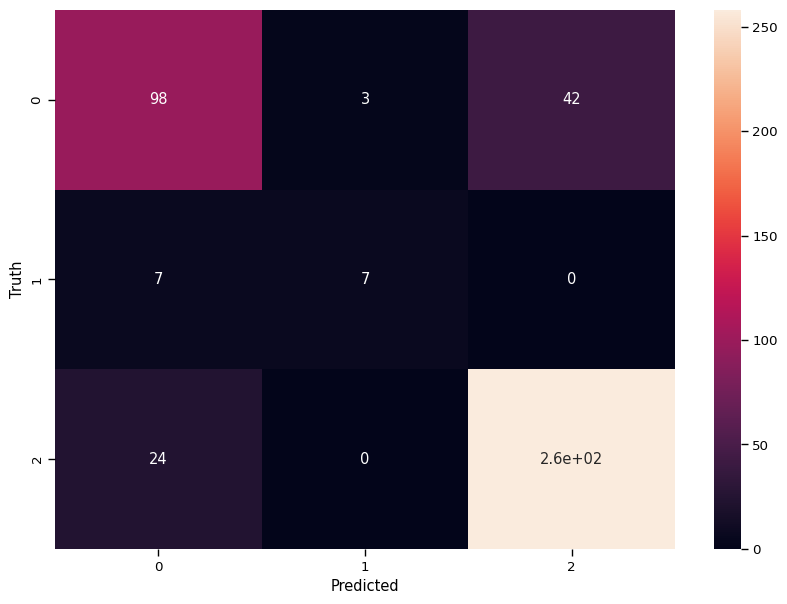

In [82]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Importing Classification Report

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       143
           1       0.70      0.50      0.58        14
           2       0.86      0.91      0.89       282

    accuracy                           0.83       439
   macro avg       0.77      0.70      0.73       439
weighted avg       0.82      0.83      0.82       439



In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.826879271070615

In the end we conclude that the Telecom Customer Churn Prediction was best worked with XGB_Classifier with an accuracy score of 82.68%

<center><img src="logo.png" width="20%"></center>